In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [ ]:
df=pd.read_csv('Ridership and Features.csv')
df.head()

,Unnamed: 0,BCT_Code,MonthS,DOWS,Ridership,Borough,Total population,Unemployment_Rate,Per_Capita_Income,18-64_Poverty
0,0,1000201,1,0,228,Manhattan,2012.0,5.1%,"13,405",29.1%
1,1,1000201,1,1,195,Manhattan,2012.0,5.1%,"13,405",29.1%
2,2,1000201,1,2,230,Manhattan,2012.0,5.1%,"13,405",29.1%
3,3,1000201,1,3,229,Manhattan,2012.0,5.1%,"13,405",29.1%
4,4,1000201,1,4,191,Manhattan,2012.0,5.1%,"13,405",29.1%


In [ ]:
df.shape

(59277, 10)

In [ ]:
df['Unemployment_Rate'] = df['Unemployment_Rate'].str.replace('%','')
df['18-64_Poverty'] = df['18-64_Poverty'].str.replace('%','')
df['Per_Capita_Income'] = df['Per_Capita_Income'].str.replace(',','')
df['Unemployment_Rate'] = pd.to_numeric(df['Unemployment_Rate'], errors='coerce')
df['18-64_Poverty'] = pd.to_numeric(df['18-64_Poverty'], errors='coerce')
df['Per_Capita_Income'] = pd.to_numeric(df['Per_Capita_Income'], errors='coerce')

In [ ]:
df=df.dropna()

In [ ]:
df.columns

Index(['Unnamed: 0', 'BCT_Code', 'MonthS', 'DOWS', 'Ridership', 'Borough',
       'Total population', 'Unemployment_Rate', 'Per_Capita_Income',
       '18-64_Poverty'],
      dtype='object')

In [ ]:
col = df.columns.tolist()
col = [col[1]] + [col[5]] + [col[4]] + col[2:4] + col[6:]
df=df[col]
df.head(3)

,BCT_Code,Borough,Ridership,MonthS,DOWS,Total population,Unemployment_Rate,Per_Capita_Income,18-64_Poverty
0,1000201,Manhattan,228,1,0,2012.0,5.1,13405.0,29.1
1,1000201,Manhattan,195,1,1,2012.0,5.1,13405.0,29.1
2,1000201,Manhattan,230,1,2,2012.0,5.1,13405.0,29.1


In [ ]:
bins = [0, 50 ,100,200, 500, 1000, 3000, 10000]
categories = ['0-50','50-100','100-200', '200-500', '500-1000', '1000-3000', '3000-10000']

df['ridership_category'] = pd.cut(df['Ridership'], bins=bins, labels=categories)
df

,BCT_Code,Borough,Ridership,MonthS,DOWS,Total population,Unemployment_Rate,Per_Capita_Income,18-64_Poverty,ridership_category
0,1000201,Manhattan,228,1,0,2012.0,5.1,13405.0,29.1,200-500
1,1000201,Manhattan,195,1,1,2012.0,5.1,13405.0,29.1,100-200
2,1000201,Manhattan,230,1,2,2012.0,5.1,13405.0,29.1,200-500
3,1000201,Manhattan,229,1,3,2012.0,5.1,13405.0,29.1,200-500
4,1000201,Manhattan,191,1,4,2012.0,5.1,13405.0,29.1,100-200
...,...,...,...,...,...,...,...,...,...,...
59272,4059100,Queens,136,12,2,5226.0,3.7,32759.0,6.9,100-200
59273,4059100,Queens,187,12,3,5226.0,3.7,32759.0,6.9,100-200
59274,4059100,Queens,151,12,4,5226.0,3.7,32759.0,6.9,100-200
59275,4059100,Queens,162,12,5,5226.0,3.7,32759.0,6.9,100-200


In [ ]:
X=df.loc[:,'MonthS':'18-64_Poverty']

y=df.loc[:,"ridership_category"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train1, X_val, y_train1, y_val = train_test_split(X, y, test_size=0.25, random_state=123)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
print('In sample accuracy:',dt.score(X_train,y_train))

In sample accuracy: 1.0


In [ ]:
accuracy = dt.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7684590337058875


In [ ]:
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
max_leaf_nodes_values = [2, 4, 6, 8, 10, 12]

# Iterate through the values and fit a decision tree model for each set of hyperparameters
best_accuracy = 0
best_params = {}
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        dt = DecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)
        dt.fit(X_train1, y_train1)
        accuracy = dt.score(X_val, y_val)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'max_depth': max_depth, 'max_leaf_nodes': max_leaf_nodes}

# Print the best hyperparameters and accuracy
print(f"Best hyperparameters: {best_params}")
print(f"Validation accuracy: {best_accuracy:.3f}")

Best hyperparameters: {'max_depth': 5, 'max_leaf_nodes': 12}
Validation accuracy: 0.397


In [ ]:
d = DecisionTreeClassifier(max_depth=5,max_leaf_nodes=12)
d.fit(X_train, y_train)

# make predictions on the test data
y_pred = d.predict(X_test)

# print the predicted class labels and the actual class labels for the test data
print("Predicted class labels:", y_pred)
print("Actual class labels:   ", y_test)

Predicted class labels: ['100-200' '1000-3000' '200-500' ... '100-200' '200-500' '1000-3000']
Actual class labels:    23958      100-200
52358      100-200
16299      200-500
5898     1000-3000
4060     1000-3000
           ...    
12808    1000-3000
13804      200-500
57693      100-200
46930     500-1000
4674     1000-3000
Name: ridership_category, Length: 11363, dtype: category
Categories (7, object): ['0-50' < '50-100' < '100-200' < '200-500' < '500-1000' < '1000-3000' < '3000-10000']


In [ ]:
from sklearn import tree
dt = DecisionTreeClassifier(max_depth=5,max_leaf_nodes=5) # just to keep it simple for visualization
dt.fit(X_train,y_train)
print(tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=['0-50','50-100','100-200', '200-500', '500-1000', '1000-3000', '3000-10000'],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\","))

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="Per_Capita_Income <= 61935.5, samples = 45449, value = [6753, 8216, 5718, 11050, 987, 6098, 6627], class = 200-500", fillcolor="#f0fdfd"] ;
1 [label="Per_Capita_Income <= 23704.0, samples = 29440, value = [6666, 7076, 815, 6759, 97, 5797, 2230], class = 50-100", fillcolor="#fefffc"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
3 [label="MonthS <= 4.5, samples = 11261, value = [4558, 2307, 122, 1404, 0, 2482, 388], class = 0-50", fillcolor="#f9e1d0"] ;
1 -> 3 ;
5 [label="samples = 3711, value = [2559, 312, 16, 206, 0, 559, 59], class = 0-50", fillcolor="#efaf81"] ;
3 -> 5 ;
6 [label="samples = 7550, value = [1999, 1995, 106, 1198, 0, 1923, 329], class = 0-50", fillcolor="#ffffff"] ;
3 -> 6 ;
4 [label="MonthS <= 2.5, samples = 18179, value = [2108, 4769, 693, 5355, 97, 3315, 1842], class = 200-500", fillcolor="#f6fefe"] ;
1 -> 4 ;
7 [l

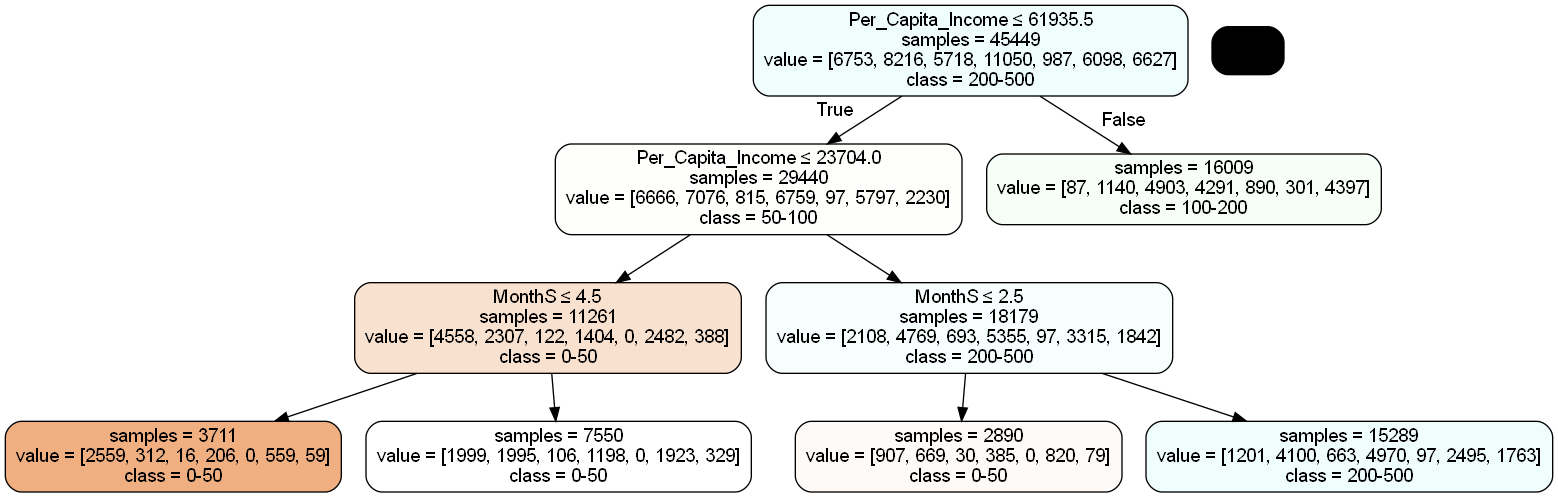

In [ ]:
from sklearn import tree
from IPython.display import Image  
import pydotplus
thestring = tree.export_graphviz(dt, out_file=None,  
                         feature_names=X_train.columns.values, 
                         class_names=['0-50','50-100','100-200', '200-500', '500-1000', '1000-3000', '3000-10000'],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())  